# Word2Vec 모델

In [7]:
import gensim
from gensim.models.word2vec import Word2Vec

In [9]:
sentences=[
                ['이','강아지는','털', '색깔이', '갈색이다'],
                ['나는', '갈색', '강아지를', '좋아한다'],
                ['푸들은', '갈색', '털이', '많다'],
                ['갈색',  '털을', '가진', '푸들', '강아지'],
                ['푸들은',  '털이', '빠지지', '않아', '자주', '미용을', '해야',' 한다'],
                ['갈색', '털이',  '있는', '강아지가', '꼬리를', '친다'],
                ['쵸키는', '내가', '키우는', '강아지다']
            ]

print(sentences)

[['이', '강아지는', '털', '색깔이', '갈색이다'], ['나는', '갈색', '강아지를', '좋아한다'], ['푸들은', '갈색', '털이', '많다'], ['갈색', '털을', '가진', '푸들', '강아지'], ['푸들은', '털이', '빠지지', '않아', '자주', '미용을', '해야', ' 한다'], ['갈색', '털이', '있는', '강아지가', '꼬리를', '친다'], ['쵸키는', '내가', '키우는', '강아지다']]


In [11]:
# 주어진 sentences를 가지고 학습하기
# sg=0 CBOW 사용 (기본값) / sg=1  Skip-gram 
# window=중심어으로 부터 주변어(양쪽 2개)
# vector_size=10 실수로 변환 10차원
# min_count=1 등장 빈도가 5회 미만인 단어는 무시

model=Word2Vec(sentences=sentences, window=2, vector_size=10, min_count=1)    
print(model)    # alpha=학습률,

Word2Vec<vocab=30, vector_size=10, alpha=0.025>


In [13]:
# 토큰의 벡터 크기
model.wv.vectors.shape    # 단어수, 사이즈

(30, 10)

In [15]:
# vocab 알아보기
vocab=model.wv.index_to_key
print(len(vocab))
print(vocab)

['갈색', '털이', '푸들은', '강아지다', '키우는', '강아지는', '털', '색깔이', '갈색이다', '나는', '강아지를', '좋아한다', '많다', '털을', '가진', '푸들', '강아지', '빠지지', '않아', '자주', '미용을', '해야', ' 한다', '있는', '강아지가', '꼬리를', '친다', '쵸키는', '내가', '이']
30


In [17]:
# 유사도 알아보기 - 코사인 값
model.wv.most_similar('푸들')

[('친다', 0.7504963278770447),
 ('좋아한다', 0.7188059091567993),
 ('가진', 0.7050308585166931),
 ('털을', 0.670322835445404),
 ('쵸키는', 0.5290866494178772),
 ('있는', 0.35353246331214905),
 ('자주', 0.30509504675865173),
 ('갈색이다', 0.2806865870952606),
 ('많다', 0.2143586426973343),
 ('미용을', 0.1710432469844818)]

In [42]:
model.wv.most_similar('푸들', topn=5)

[('강아지', 0.3914641737937927),
 ('갈색', 0.3813685476779938),
 ('털을', 0.3506375551223755),
 (' 한다', 0.2354077696800232),
 ('빠지지', 0.22809626162052155)]

In [44]:
# model.wv.most_similar('프돌', topn=5)    # 오타 Error

[('강아지는', 0.5810441374778748),
 ('친다', 0.3380281925201416),
 ('내가', 0.32021215558052063),
 ('털', 0.2584652602672577),
 ('이', 0.24636545777320862)]

In [46]:
model.wv.similarity('갈색', '푸들')

0.38136858

# FastText 모델 

In [48]:
from gensim.models.fasttext import FastText

In [50]:
# 주어진 sentences를 가지고 학습하기
model=FastText(sentences=sentences, window=2, vector_size=10, min_count=1, )
print(model)

FastText<vocab=30, vector_size=10, alpha=0.025>


In [52]:
# 토큰의 벡터 크기
model.wv.vectors.shape

(30, 10)

In [54]:
# vocab 알아보기
vocab=model.wv.index_to_key
print(vocab)
print(len(vocab))

['갈색', '털이', '푸들은', '강아지다', '키우는', '강아지는', '털', '색깔이', '갈색이다', '나는', '강아지를', '좋아한다', '많다', '털을', '가진', '푸들', '강아지', '빠지지', '않아', '자주', '미용을', '해야', ' 한다', '있는', '강아지가', '꼬리를', '친다', '쵸키는', '내가', '이']
30


In [56]:
model.wv.most_similar('프돌', topn=5)

[('강아지는', 0.5810441374778748),
 ('친다', 0.3380281925201416),
 ('내가', 0.32021215558052063),
 ('털', 0.2584652602672577),
 ('이', 0.24636545777320862)]

In [58]:
model.wv.most_similar('푸들', topn=5)

[('강아지', 0.3914641737937927),
 ('갈색', 0.3813685476779938),
 ('털을', 0.3506375551223755),
 (' 한다', 0.2354077696800232),
 ('빠지지', 0.22809626162052155)]

# 네이버 영화 리뷰 - 유사도 검사

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

import matplotlib.pyplot as plt
import matplotlib as mpl                    
mpl.rc('font', family='Malgun Gothic')      
plt.rcParams['axes.unicode_minus']=False  

import re
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer

from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
from gensim.models import Word2Vec

## 데이터 로드

In [112]:
# 네이버 영화 리뷰 - 유사도 검사
train_data=pd.read_table('./Data/ratings.txt')
train_data.shape

(200000, 3)

In [114]:
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [116]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [118]:
train_data.dropna(inplace=True)

In [120]:
train_data.shape

(199992, 3)

## 자연어 전처리
- 정규화, 불용어, 토근화

In [123]:
# 정규표현식 : 한글과 공백을 제외하고 모두 제거
train_data['document']=train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True) 

In [128]:
# 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [140]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
kiwi=Kiwi()

X_train=[]
for sentence in tqdm(train_data['document']):
    tokens=kiwi.tokenize(sentence)
    filtered_tokens=[token.form for token in tokens if token.form not in stopwords]
    X_train.append(filtered_tokens)

100%|█████████████████████████████████████████████████████████████████████████| 199992/199992 [05:49<00:00, 572.95it/s]


리뷰의 최대 길이 : 93
리뷰의 평균 길이 : 14.883625345013801


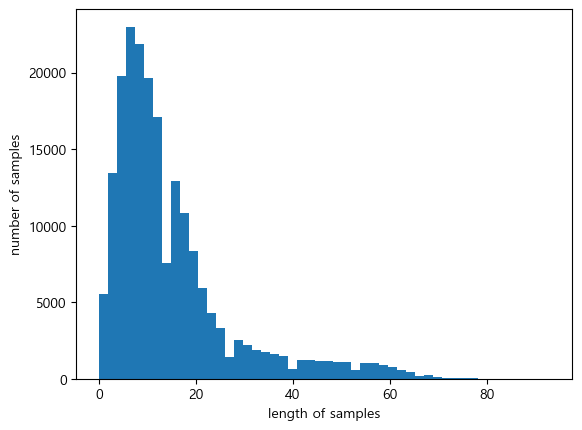

In [159]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))

plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## Word2Vec 
- 유사도, 챗봇, 번역 등등

In [166]:
#  min_count=5  등장 빈도가 5회 미만인 단어는 무시
#  workers=4  병렬 처리에 사용할 CPU 코어 수
model=Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=5, workers=4)

In [167]:
model.wv.vectors.shape

(14909, 100)

In [170]:
print(model.wv.most_similar("최민식"))

[('박중훈', 0.8577596545219421), ('안성기', 0.8538902997970581), ('조재현', 0.8514261841773987), ('한석규', 0.8487911224365234), ('박신양', 0.8467841148376465), ('최민수', 0.8411201238632202), ('이정재', 0.8350152969360352), ('송강호', 0.832614004611969), ('이미숙', 0.832137942314148), ('신하균', 0.8319923281669617)]


In [172]:
print(model.wv.most_similar("히어로"))

[('첩보', 0.8711270093917847), ('호러', 0.8444681167602539), ('무협', 0.8206143975257874), ('블록버스터', 0.798004686832428), ('슬래셔', 0.7929278016090393), ('하이틴', 0.7920427322387695), ('패러디', 0.7910550832748413), ('고어', 0.785830557346344), ('느와르', 0.7849485874176025), ('액션물', 0.7848687171936035)]


# 영어 강연 스크립트 모음

In [250]:
import tensorflow as tf
from tensorflow import keras  
from keras.models import Sequential

import re
import urllib
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import KeyedVectors

## 데이터 로드 및 전처리

In [22]:
url="https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml"
filname="./Data/ted_en-20160408.xml"
urllib.request.urlretrieve(url, filname)    # 다운로드

('./Data/ted_en-20160408.xml', <http.client.HTTPMessage at 0x18ff34b5d90>)

In [44]:
with open("./Data/ted_en-20160408.xml", "r", encoding="utf8") as f:
    for _ in range(300): 
        pass
        # print(f.readline().strip())    # PPT 참조

In [31]:
target_xml=open('./Data/ted_en-20160408.xml', 'r', encoding='UTF8')
target_tree=etree.parse(target_xml)
parse_text='\n'.join(target_tree.xpath('//content/text()'))
type(parse_text)

str

In [37]:
parse_text[:100]

"Here are two reasons companies fail: they only do more of the same, or they only do what's new.\nTo m"

In [57]:
content_text=re.sub(r'\([^)]*\)', '', parse_text)

In [59]:
text="This is a test (inside brackets) and more text (another one)."
results=re.sub(r'\([^)]*\)', '', text)
print(results)

This is a test  and more text .


In [61]:
sent_text=sent_tokenize(content_text)   # 문장단위로 

In [84]:
normalized_text=[]
for string in sent_text:
     tokens=re.sub(r"[^a-z0-9]", " ", string.lower())   # 모든문자 소문자로 변환
     normalized_text.append(tokens)

In [86]:
normalized_text[:2]

['here are two reasons companies fail  they only do more of the same  or they only do what s new ',
 'to me the real  real solution to quality growth is figuring out the balance between two activities  exploration and exploitation ']

In [98]:
result=[word_tokenize(sentence) for sentence in normalized_text]

In [99]:
print(result[:2])

[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']]


In [100]:
len(result)

273424

In [111]:
model=Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4)

In [115]:
model_result=model.wv.most_similar("man")
print(model_result)

[('woman', 0.8258683681488037), ('guy', 0.8039352893829346), ('boy', 0.7568116188049316), ('lady', 0.7422431111335754), ('soldier', 0.7309489846229553), ('gentleman', 0.7192891240119934), ('girl', 0.7133409380912781), ('kid', 0.7127191424369812), ('poet', 0.6658616662025452), ('rabbi', 0.6609618067741394)]


## 모델 저장 및 로드

In [119]:
model.wv.save_word2vec_format('./Data/eng_w2v.bin')      # 저장  bin 또는 text 저장

In [123]:
loaded_model=KeyedVectors.load_word2vec_format("./Data/eng_w2v.bin")    # 읽기

In [126]:
model_result=loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8258683681488037), ('guy', 0.8039352893829346), ('boy', 0.7568116188049316), ('lady', 0.7422431111335754), ('soldier', 0.7309489846229553), ('gentleman', 0.7192891240119934), ('girl', 0.7133409380912781), ('kid', 0.7127191424369812), ('poet', 0.6658616662025452), ('rabbi', 0.6609618067741394)]


# Word2Vec 사전학습
- 구글 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM

In [146]:
word2vec_model=KeyedVectors.load_word2vec_format('./Data/GoogleNews-vectors-negative300.bin', 
                                                 binary=True)

In [204]:
print(word2vec_model.vectors.shape)

(3000000, 300)


In [206]:
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))
# print(word2vec_model['book'])

0.40797037
0.057204388


In [208]:
sentences=[
    "I am happy",
    "This movie is nice",
    "I feel sad",
    "Such a nice day"
]

In [210]:
# 토크나이저로 단어 인덱스 생성
token=Tokenizer()
token.fit_on_texts(sentences)

vocab_size=len(token.word_index) + 1
vocab_size

13

In [212]:
# 임베딩테이블 생성 및 초기화
embed_matrix=np.zeros((vocab_size, 300))

# 사전에 훈련 Word2Vec에서 단어 백터 불러오는 함수
def get_veoctor(word):
    if word in word2vec_model:
        return word2vec_model[word]  # word2vec_model['apple']
    else:
        return None

In [217]:
# 내 단어들에 대한 임베딩 벡터 매핑
for word, idx in token.word_index.items():
    vec=get_veoctor(word)    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    
    if vec is not None:
        embed_matrix[idx]=vec

In [223]:
# 결과 확인: 'nice' 단어 벡터와 인덱스 출력
print("단어 'nice'의 인덱스:", token.word_index['nice'])
print("임베딩 행렬 내 'nice' 벡터:", embed_matrix[token.word_index['nice']][:3])
print("사전 훈련 Word2Vec의 'nice' 벡터:", word2vec_model['nice'][:3])

단어 'nice'의 인덱스: 2
임베딩 행렬 내 'nice' 벡터: [ 0.15820312  0.10595703 -0.18945312]
사전 훈련 Word2Vec의 'nice' 벡터: [ 0.15820312  0.10595703 -0.18945312]


In [254]:
model=Sequential()
model.add(keras.layers.Embedding(input_dim=vocab_size, 
                                  output_dim=300, 
                                  weights=[embed_matrix], 
                                  trainable=False))   # 훈련 중 이 임베딩 벡터를 고정함 (값이 업데이트되지 않음)
model.add(keras.layers.LSTM(64)) 
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │           3,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,900 (15.23 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,900 (15.23 KB)